In [1]:
conda install -c conda-forge folium


Solving environment: done

## Package Plan ##

  environment location: /Users/linahrusere/anaconda3

  added / updated specs:
    - folium


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/osx-arm64::certifi-2023.5.7~ --> conda-forge/noarch::certifi-2023.5.7-pyhd8ed1ab_0 
  openssl              pkgs/main::openssl-1.1.1t-h1a28f6b_0 --> conda-forge::openssl-1.1.1t-h03a7124_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

## Package Plan ##

  environment location: /Users/linahrusere/anaconda3

  added / updated specs:
    - missingno


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2023.5.7-~ --> pkgs/main/osx-arm64::certifi-2023.5.7-py310hca03da5_0 
  openssl            conda-forge::openssl-1.1.1t-h03a7124_0 --> pkgs/main::openssl-1.1.1t-h1a28f6b_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import json
import os
from datetime import datetime
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 50)
from tqdm import tqdm

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import glob

df_dict =dict()

files = glob.glob("/Users/linahrusere/Documents/EHR/csv 2/*.csv")
for a in files:
    df_name = a.split('/')[-1].split('.')[0] + "_df"
    df= pd.read_csv(a)
    df_dict[df_name] = df


In [6]:
df_dict.keys()

dict_keys(['medications_df', 'providers_df', 'payer_transitions_df', 'imaging_studies_df', 'supplies_df', 'payers_df', 'allergies_df', 'procedures_df', 'organizations_df', 'conditions_df', 'careplans_df', 'encounters_df', 'devices_df', 'immunizations_df', 'patients_df', 'observations_df'])

In [7]:
patients_df = df_dict['patients_df']
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1171 non-null   object 
 1   BIRTHDATE            1171 non-null   object 
 2   DEATHDATE            171 non-null    object 
 3   SSN                  1171 non-null   object 
 4   DRIVERS              958 non-null    object 
 5   PASSPORT             898 non-null    object 
 6   PREFIX               927 non-null    object 
 7   FIRST                1171 non-null   object 
 8   LAST                 1171 non-null   object 
 9   SUFFIX               12 non-null     object 
 10  MAIDEN               331 non-null    object 
 11  MARITAL              791 non-null    object 
 12  RACE                 1171 non-null   object 
 13  ETHNICITY            1171 non-null   object 
 14  GENDER               1171 non-null   object 
 15  BIRTHPLACE           1171 non-null   o

In [8]:
encounters_df = df_dict['encounters_df'][['Id', 'START', 'STOP', 'PATIENT']]
encounters_df['START'] =pd.to_datetime(encounters_df['START'], infer_datetime_format=True)
encounters_df['STOP'] =pd.to_datetime(encounters_df['STOP'], infer_datetime_format=True)
encounters_df.rename(columns={'START':"DATE", 'Id':"ENCOUNTER"}, inplace=True)

encounters_df

,ENCOUNTER,DATE,STOP,PATIENT
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23 18:10:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23 18:00:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27 13:28:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592
...,...,...,...,...
53341,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20 17:27:52+00:00,2015-06-20 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d
53342,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25 17:27:52+00:00,2016-06-25 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d
53343,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01 17:27:52+00:00,2017-07-01 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d
53344,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07 17:27:52+00:00,2018-07-07 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d


In [9]:
#Calculate age at encounter
birthdate_df= patients_df[['Id', 'BIRTHDATE']]
encounters_df = pd.merge(encounters_df, birthdate_df, left_on="PATIENT", right_on="Id", how="left").drop(['Id'], axis=1)
#Get patient age at visit
encounters_df['BIRTHDATE'] =pd.to_datetime(encounters_df['BIRTHDATE'], infer_datetime_format=True)
#Calculate age
encounters_df["firstyear"]= encounters_df['BIRTHDATE'].apply(lambda x : (x.year))
encounters_df["visit_year"]= encounters_df["DATE"].apply(lambda x : (x.year))
encounters_df["AGE"] = encounters_df["visit_year"] - encounters_df["firstyear"]
encounters_df=encounters_df.drop(columns=["visit_year","firstyear", 'BIRTHDATE'])

In [10]:
encounters_df

,ENCOUNTER,DATE,STOP,PATIENT,AGE
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23 18:10:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,27
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23 18:00:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,29
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,12
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,22
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27 13:28:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,18
...,...,...,...,...,...
53341,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20 17:27:52+00:00,2015-06-20 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,101
53342,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25 17:27:52+00:00,2016-06-25 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,102
53343,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01 17:27:52+00:00,2017-07-01 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,103
53344,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07 17:27:52+00:00,2018-07-07 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,104


### Careplans

In [11]:
careplans_df = df_dict['careplans_df']
list(careplans_df['DESCRIPTION'].unique())

['Respiratory therapy',
 'Wound care',
 'Physical therapy procedure',
 'Urinary tract infection care',
 'Fracture care',
 'Routine antenatal care',
 'Diabetes self management plan',
 'Lifestyle education regarding hypertension',
 'Self-care interventions (procedure)',
 'Musculoskeletal care',
 'Minor surgery care management (procedure)',
 'Asthma self management',
 'Allergic disorder monitoring',
 'Head injury rehabilitation',
 'Hyperlipidemia clinical management plan',
 'Skin condition care',
 'Burn care',
 'Care plan (record artifact)',
 'Cancer care plan',
 'Chronic obstructive pulmonary disease clinical management plan',
 'Mental health care plan',
 'Care Plan',
 'Overactivity/inattention behavior management',
 'Demential management',
 'Major surgery care management',
 'Terminal care',
 'Heart failure self management plan',
 'Inpatient care plan (record artifact)',
 'Spinal cord injury rehabilitation',
 'Dialysis care plan (record artifact)',
 'Psychiatry care plan',
 'Major depres

# Filter Pregnant Patients

In [12]:
careplans_df

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
2,a3bb6e99-3b99-44b3-974c-e230b4511b5c,2011-12-31,2012-11-30,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,16300c56-a035-4126-a656-68c093da6dfc,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
3,9f5284b7-425a-486a-b36e-ab818c018f2f,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
4,47ede16c-c216-4f81-a16b-0e858de9cdc3,2017-01-22,2017-02-12,10339b10-3cd1-4ac3-ac13-ec26728cb592,4ec8d55b-05fc-42a5-bfa3-1e233874a362,225358003,Wound care,284551006.0,Laceration of foot
...,...,...,...,...,...,...,...,...,...
3478,5998d466-9922-4a35-9277-7a902352ce48,1983-09-08,1983-09-29,fca3178e-fb68-41c3-8598-702d3ca68b96,9e9670e5-da7f-4111-98a6-21d5e0aadd86,91251008,Physical therapy procedure,70704007.0,Sprain of wrist
3479,3de3b598-ca98-4b98-947a-34e3e86630e6,1984-09-23,1984-11-22,fca3178e-fb68-41c3-8598-702d3ca68b96,8d7d70be-467d-430f-8497-25aa2c1276b8,385691007,Fracture care,263102004.0,Fracture subluxation of wrist
3480,6f02c458-e04f-429d-99ce-72626d87952d,1987-09-27,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,48ea35a8-37cd-41d2-86c1-7785b514c453,735984001,Heart failure self management plan,88805009.0,Chronic congestive heart failure (disorder)
3481,243de451-1e53-40fc-b4ae-e0ea730e4a0d,1990-03-15,NaN,fca3178e-fb68-41c3-8598-702d3ca68b96,aaee3543-3edb-40af-a276-3bb027cac0dc,736353004,Inpatient care plan (record artifact),NaN,NaN


In [13]:
pregnant_patients = careplans_df[careplans_df['DESCRIPTION'] == 'Routine antenatal care']

# Explore conditions data

In [14]:
conditions_df=df_dict['conditions_df']
conditions_df['START'] =pd.to_datetime(conditions_df['START'], infer_datetime_format=True)
conditions_df['STOP'] =pd.to_datetime(conditions_df['STOP'], infer_datetime_format=True)
conditions_df.rename(columns={'START':"DATE"}, inplace=True)
conditions_df

,DATE,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaT,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...
8371,1984-12-29,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder)
8372,1988-08-24,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder)
8373,2009-08-08,NaT,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder)


In [15]:
outcomes = ['Normal pregnancy',
'Miscarriage in first trimester',
'Tubal pregnancy',
'Fetus with unknown complication',
'Antepartum eclampsia',
'Preeclampsia',
'Blighted ovum'
]
preg = conditions_df[conditions_df['DESCRIPTION'].isin(outcomes)]

In [16]:
len(set(preg['PATIENT'].unique()))

332

In [17]:
pregnant_patients_list = set(list(pregnant_patients['PATIENT'].unique()) + list(preg['PATIENT'].unique()))

In [18]:
len(pregnant_patients_list)

338

### Filter patients_df for only pregnant women

In [19]:
patients_df = patients_df[patients_df['Id'].isin(pregnant_patients_list)]

### Filter careplans_df for only pregnant women

In [20]:
careplans_df = careplans_df[careplans_df['PATIENT'].isin(pregnant_patients_list)]

### Filter conditions_df for only pregnant women

In [21]:
conditions_df = conditions_df[conditions_df['PATIENT'].isin(pregnant_patients_list)]

In [22]:
conditions_df = conditions_df.sort_values('DATE')

conditions_df

,DATE,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
3936,1924-10-26,NaT,6abdc54d-098e-47dc-8e11-701464386c67,1154fa1c-7816-499f-b52a-3f99f445e447,162864005,Body mass index 30+ - obesity (finding)
5121,1927-12-15,NaT,899a4f9c-abc3-4a13-88e4-0f7862ee6ab5,082de3e1-e159-483b-8b33-8b806a86d295,410429000,Cardiac Arrest
5122,1927-12-15,NaT,899a4f9c-abc3-4a13-88e4-0f7862ee6ab5,082de3e1-e159-483b-8b33-8b806a86d295,429007001,History of cardiac arrest (situation)
2131,1928-01-03,NaT,de767c9e-3131-4d1a-9eed-fdd86a15d459,2fd2c9d4-2004-4d77-af0e-a79412a044a7,232353008,Perennial allergic rhinitis with seasonal vari...
7891,1929-10-12,NaT,66135cde-428a-4cf7-bc1d-d5ddce40d9cd,53b2495a-3ad3-4045-9932-853420d96550,162864005,Body mass index 30+ - obesity (finding)
...,...,...,...,...,...,...
2181,2020-04-18,2020-04-25,ed55adb7-3395-4c69-a0b8-b85936c1731c,d9d6a77a-b112-434e-b56d-ea77cda6a99b,72892002,Normal pregnancy
2182,2020-04-18,2020-04-25,ed55adb7-3395-4c69-a0b8-b85936c1731c,d9d6a77a-b112-434e-b56d-ea77cda6a99b,156073000,Fetus with unknown complication
1614,2020-04-18,NaT,21ce6dc0-8668-4221-a5bc-6d6a1afe4c52,e8ffc41b-8869-426f-88d6-92f05afffe4f,444814009,Viral sinusitis (disorder)
4134,2020-04-19,NaT,9394cb52-7d92-4577-976e-d017af06ed8f,acd35901-6cb3-43a2-8707-4e88e49ccb2a,444814009,Viral sinusitis (disorder)


# Get history of conditions per encounter

In [23]:
# Label encode all the conditions

from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
Conditions = list(conditions_df['DESCRIPTION'].unique())
Conditions_hashmap = pd.DataFrame(Conditions, columns=['Conditions'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Conditions_hashmap['Conditions_label'] = labelencoder.fit_transform(Conditions_hashmap['Conditions'])
Conditions_hashmap

,Conditions,Conditions_label
0,Body mass index 30+ - obesity (finding),12
1,Cardiac Arrest,16
2,History of cardiac arrest (situation),48
3,Perennial allergic rhinitis with seasonal vari...,83
4,Hypertension,53
...,...,...
104,Closed fracture of hip,26
105,Tear of meniscus of knee,105
106,Primary fibromyalgia syndrome,88
107,Overlapping malignant neoplasm of colon,80


In [24]:
# get list of all pregnancy conditions labels 
oc_df = Conditions_hashmap[Conditions_hashmap['Conditions'].isin(outcomes)]
preg_outcomes_labels= list(oc_df['Conditions_label'])

In [25]:
preg_outcomes_labels

[69, 106, 75, 11, 6, 40, 87]

In [26]:
# Get conditionds label for each encounter

history_conditions=conditions_df.merge(Conditions_hashmap, how='left', left_on='DESCRIPTION', right_on='Conditions')
history_conditions = history_conditions[['DATE', 'PATIENT', 'ENCOUNTER', 'Conditions_label']]
history_conditions

,DATE,PATIENT,ENCOUNTER,Conditions_label
0,1924-10-26,6abdc54d-098e-47dc-8e11-701464386c67,1154fa1c-7816-499f-b52a-3f99f445e447,12
1,1927-12-15,899a4f9c-abc3-4a13-88e4-0f7862ee6ab5,082de3e1-e159-483b-8b33-8b806a86d295,16
2,1927-12-15,899a4f9c-abc3-4a13-88e4-0f7862ee6ab5,082de3e1-e159-483b-8b33-8b806a86d295,48
3,1928-01-03,de767c9e-3131-4d1a-9eed-fdd86a15d459,2fd2c9d4-2004-4d77-af0e-a79412a044a7,83
4,1929-10-12,66135cde-428a-4cf7-bc1d-d5ddce40d9cd,53b2495a-3ad3-4045-9932-853420d96550,12
...,...,...,...,...
3134,2020-04-18,ed55adb7-3395-4c69-a0b8-b85936c1731c,d9d6a77a-b112-434e-b56d-ea77cda6a99b,75
3135,2020-04-18,ed55adb7-3395-4c69-a0b8-b85936c1731c,d9d6a77a-b112-434e-b56d-ea77cda6a99b,40
3136,2020-04-18,21ce6dc0-8668-4221-a5bc-6d6a1afe4c52,e8ffc41b-8869-426f-88d6-92f05afffe4f,107
3137,2020-04-19,9394cb52-7d92-4577-976e-d017af06ed8f,acd35901-6cb3-43a2-8707-4e88e49ccb2a,107


In [27]:
#Get list of all conditions per patient and list of acorresponding encounters 
history_conditions = history_conditions.groupby(['PATIENT']).apply(lambda x: [list(x['Conditions_label']), list(x['ENCOUNTER'])]).apply(pd.Series)
history_conditions= history_conditions.reset_index()
history_conditions.columns = ['PATIENT', 'labels', 'encounters']

In [28]:
history_conditions

,PATIENT,labels,encounters
0,0149d553-f571-4e99-867e-fcb9625d07c2,"[12, 13, 86, 5, 75, 41, 3, 107, 107]","[acbf9d2b-c7eb-400d-a020-c311dd5bc36b, 3132eb1..."
1,01e1f394-7219-4189-bceb-3cbd90cff90b,"[86, 75, 102, 6, 96, 75, 103]","[e4ad3cd6-d62c-4a22-8f55-0333ec8cbf18, 3c88f6a..."
2,0325261f-61eb-46f8-acc6-89d15053fecd,"[48, 16, 86, 69, 53, 33, 25, 67, 54, 51, 52, 9...","[c6e3db0e-8515-495d-a73d-02de2090cc56, c6e3db0..."
3,0447625b-b860-483c-9f30-17ed375b1493,"[25, 69, 12, 2, 52, 16, 48]","[d0fff2cb-7a00-44f8-9071-c7cf8fe91dce, 6171ade..."
4,04a849f4-1aaf-4112-a62f-d44df4325773,"[107, 2, 29, 20, 56, 24, 46, 53, 75, 107, 75, ...","[372479c3-dae3-4a37-96f1-7c81babb7ccc, e1f73b8..."
...,...,...,...
333,fca3178e-fb68-41c3-8598-702d3ca68b96,"[69, 12, 25, 86, 5, 103, 101, 46, 102, 19]","[d640e83d-39ce-4451-9705-93a3f3fa4076, 7f24578..."
334,fd0b3930-9d0a-45e4-a63f-deb872627381,"[53, 75, 75, 6]","[b8d5aad2-e838-4437-bd47-6521f459838f, 5a5736b..."
335,fdb2a2ee-09c2-499b-b324-d998d5226f19,"[69, 12, 77, 86, 3, 3, 63, 107]","[1d20181d-9e63-4fba-b376-71624f11b7b3, 9f231b7..."
336,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,"[25, 56, 20, 24, 69, 36, 75, 29, 3, 75, 3, 2, ...","[f9461573-39f6-42cf-a33f-bafae52b5172, 6bbe31f..."


In [29]:
#  Get the encounter condition and any recorded conditions before the encounter
encounter_dict = {}
outcome_label = {}
normal_pregnancy = {}
num_pregnancy_visits = {}
for i, row in history_conditions.iterrows():
    for j in range(len(row['encounters'])):
        encounter = row['encounters'][j] #Get the encounter condition
        history = row['labels'][:j] #Get the encounter conditions history.
        encounter_dict[encounter] = history 
        label = row['labels'][j]
        outcome_label[encounter] = label
        
        if label == 75:
            normal_pregnancy[encounter] = 1 #If the encounter condition is normal pregnancy (1), if not (0) 
        else:
            normal_pregnancy[encounter] = 0
        
        visits = sum(x in preg_outcomes_labels for x in history)#Get the number prenancy related encounters in history
        num_pregnancy_visits[encounter] = visits
            
        
history_encounter_conditions = pd.concat([pd.DataFrame([encounter_dict]),pd.DataFrame([num_pregnancy_visits]), pd.DataFrame([outcome_label]), pd.DataFrame([normal_pregnancy])])

In [30]:
history_encounter_conditions

,acbf9d2b-c7eb-400d-a020-c311dd5bc36b,3132eb11-9a46-46ca-b3b1-7ac2ac844f8e,f8f265b5-ab11-417a-af90-e2ab3f34a4e8,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,8372ee4e-7a34-43b6-9e41-45267059d76f,4600cd16-8cc7-467e-af7c-fca906341a60,e233a6eb-b183-4941-8d7d-fa7dd6b58cf3,b0db65f1-3940-4b1f-91aa-afa6ab918b13,e4ad3cd6-d62c-4a22-8f55-0333ec8cbf18,3c88f6a7-964f-49f7-a9ed-85c52d747ebe,...,4858788a-9890-4fa3-a45c-81c2d2ab878f,4fa5ad18-873a-400e-a0e0-aa0ed5e4e4a2,7ff6f9d3-5f2d-462e-a087-86cb9d075fb8,9b5520a2-096f-4b00-aa0f-ed7e42f3558e,5d80dcd2-6030-4ecf-ad78-9530e1b53567,4db3c00c-f631-4678-ac84-23ddc4c1c553,14cf9ccc-a6b8-4fca-9f73-71cce58aa534,f3e16e4a-064f-4005-abcd-18fe3d068332,8733aff3-64b8-4731-a12b-f2d588c8c2c2,1e5d32a6-cf19-45a4-827a-3129f6a047c4
0,[],[12],"[12, 13, 86]","[12, 13, 86, 5]","[12, 13, 86, 5, 75]","[12, 13, 86, 5, 75, 41]","[12, 13, 86, 5, 75, 41, 3]","[12, 13, 86, 5, 75, 41, 3, 107]",[],[86],...,"[25, 56, 20, 24, 69, 36, 75, 29, 3, 75, 3, 2, 39]","[25, 56, 20, 24, 69, 36, 75, 29, 3, 75, 3, 2, ...",[],[47],"[47, 7]","[47, 7, 12]","[47, 7, 12, 75]","[47, 7, 12, 75, 75]","[47, 7, 12, 75, 75, 87]","[47, 7, 12, 75, 75, 87, 107]"
0,0,0,0,0,1,1,1,1,0,0,...,3,3,0,0,0,0,1,2,3,3
0,12,13,5,75,41,3,107,107,86,75,...,12,102,47,7,12,75,75,87,107,27
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [31]:
#Transpose df and add column labels
history_encounter_conditions = history_encounter_conditions.T.reset_index()
history_encounter_conditions.columns = ['ENCOUNTER', "history", 'num_pregnancy_visits', 'outcome', 'normal_pregnancy']

In [32]:
history_encounter_conditions

,ENCOUNTER,history,num_pregnancy_visits,outcome,normal_pregnancy
0,acbf9d2b-c7eb-400d-a020-c311dd5bc36b,[],0,12,0
1,3132eb11-9a46-46ca-b3b1-7ac2ac844f8e,[12],0,13,0
2,f8f265b5-ab11-417a-af90-e2ab3f34a4e8,"[12, 13, 86]",0,5,0
3,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,"[12, 13, 86, 5]",0,75,1
4,8372ee4e-7a34-43b6-9e41-45267059d76f,"[12, 13, 86, 5, 75]",1,41,0
...,...,...,...,...,...
2854,4db3c00c-f631-4678-ac84-23ddc4c1c553,"[47, 7, 12]",0,75,1
2855,14cf9ccc-a6b8-4fca-9f73-71cce58aa534,"[47, 7, 12, 75]",1,75,1
2856,f3e16e4a-064f-4005-abcd-18fe3d068332,"[47, 7, 12, 75, 75]",2,87,0
2857,8733aff3-64b8-4731-a12b-f2d588c8c2c2,"[47, 7, 12, 75, 75, 87]",3,107,0


In [33]:
#select encounters related to pregnancy
history_df = history_encounter_conditions[history_encounter_conditions['outcome'].isin(preg_outcomes_labels)]
history_df = history_df.reset_index(drop=True)
history_df

,ENCOUNTER,history,num_pregnancy_visits,outcome,normal_pregnancy
0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,"[12, 13, 86, 5]",0,75,1
1,3c88f6a7-964f-49f7-a9ed-85c52d747ebe,[86],0,75,1
2,50d8b07c-6fd8-4fcc-a8cf-261719005462,"[86, 75, 102]",1,6,0
3,3b063336-f151-42e5-b17d-957249530d64,"[86, 75, 102, 6, 96]",2,75,1
4,cd5830a3-5c27-41c6-8a1f-3eba1169c623,"[48, 16, 86]",0,69,0
...,...,...,...,...,...
755,0f50789a-63de-4ea7-95de-6636597ab819,"[25, 56, 20, 24, 69, 36]",1,75,1
756,cba000d2-0fec-486d-ae55-dfa9a7b20b65,"[25, 56, 20, 24, 69, 36, 75, 29, 3]",2,75,1
757,4db3c00c-f631-4678-ac84-23ddc4c1c553,"[47, 7, 12]",0,75,1
758,14cf9ccc-a6b8-4fca-9f73-71cce58aa534,"[47, 7, 12, 75]",1,75,1


# one-hot-encode conditions history_df

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(history_df['history']),
                   columns=mlb.classes_,
                   index=history_df.index)
conditions_history_df = history_df.join(res)

In [35]:
#Rename columns
Conditions_hashmap = Conditions_hashmap.sort_values("Conditions_label")
Conditions_hashmap_sel = Conditions_hashmap[Conditions_hashmap['Conditions_label'].isin(list(conditions_history_df.columns))]
col_dict = Conditions_hashmap_sel.set_index('Conditions_label').to_dict()
conditions_history_df = conditions_history_df.rename(col_dict['Conditions'], axis=1)

In [36]:
conditions_history_df

,ENCOUNTER,history,num_pregnancy_visits,outcome,normal_pregnancy,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Anemia (disorder),...,Second degree burn,Seizure disorder,Sinusitis (disorder),Sprain of ankle,Sprain of wrist,Streptococcal sore throat (disorder),Stroke,Tubal pregnancy,Viral sinusitis (disorder),Whiplash injury to neck
0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,"[12, 13, 86, 5]",0,75,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3c88f6a7-964f-49f7-a9ed-85c52d747ebe,[86],0,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50d8b07c-6fd8-4fcc-a8cf-261719005462,"[86, 75, 102]",1,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3b063336-f151-42e5-b17d-957249530d64,"[86, 75, 102, 6, 96]",2,75,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,cd5830a3-5c27-41c6-8a1f-3eba1169c623,"[48, 16, 86]",0,69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0f50789a-63de-4ea7-95de-6636597ab819,"[25, 56, 20, 24, 69, 36]",1,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,cba000d2-0fec-486d-ae55-dfa9a7b20b65,"[25, 56, 20, 24, 69, 36, 75, 29, 3]",2,75,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
757,4db3c00c-f631-4678-ac84-23ddc4c1c553,"[47, 7, 12]",0,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,14cf9ccc-a6b8-4fca-9f73-71cce58aa534,"[47, 7, 12, 75]",1,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Explore observations data

### Filter observations_df for only pregnant women

In [37]:
observations_df = df_dict['observations_df']
#filter relevant patients
observations_df = observations_df[observations_df['PATIENT'].isin(pregnant_patients_list)]

In [38]:
observations_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
864,2010-05-22T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,f249d644-2620-45d7-8838-5177dd08d749,8302-2,Body Height,157.9,cm,numeric
865,2010-05-22T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,f249d644-2620-45d7-8838-5177dd08d749,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
866,2010-05-22T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,f249d644-2620-45d7-8838-5177dd08d749,29463-7,Body Weight,68.5,kg,numeric
867,2010-05-22T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,f249d644-2620-45d7-8838-5177dd08d749,39156-5,Body Mass Index,27.5,kg/m2,numeric
868,2010-05-22T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,f249d644-2620-45d7-8838-5177dd08d749,8462-4,Diastolic Blood Pressure,83.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
299692,2015-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299693,2016-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299694,2017-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric
299695,2018-09-05T16:27:52Z,fc817953-cc8b-45db-9c85-7c0ced8fa90d,NaN,QOLS,QOLS,1.0,{score},numeric


In [39]:
#sort by date
observations_df = observations_df.sort_values('DATE')

In [40]:
observations_df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
223672,1948-02-06T20:51:21Z,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,8302-2,Body Height,109.2,cm,numeric
223673,1948-02-06T20:51:21Z,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,4.0,{score},numeric
223674,1948-02-06T20:51:21Z,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,29463-7,Body Weight,21.4,kg,numeric
223675,1948-02-06T20:51:21Z,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,39156-5,Body Mass Index,18.0,kg/m2,numeric
223676,1948-02-06T20:51:21Z,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,59576-9,Body mass index (BMI) [Percentile] Per age and...,87.9,%,numeric
...,...,...,...,...,...,...,...,...
1843,2020-04-28T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,777-3,Platelets [#/volume] in Blood by Automated count,354.5,10*3/uL,numeric
1847,2020-04-28T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,4548-4,Hemoglobin A1c/Hemoglobin.total in Blood,5.8,%,numeric
1846,2020-04-28T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,72166-2,Tobacco smoking status NHIS,Former smoker,NaN,text
1832,2020-04-28T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,6298-4,Potassium,4.1,mmol/L,numeric


In [41]:
#join the units and description columns
observations_df['DATE'] =pd.to_datetime(observations_df['DATE'], infer_datetime_format=True)
observations_df['CODE'] = observations_df['CODE'].astype(str) + '_' +observations_df['UNITS']

In [42]:
observations_df['TYPE'].unique()

array(['numeric', 'text'], dtype=object)

In [43]:
#Divide df into numerical and categotical values
cat_observations = observations_df[observations_df['TYPE']=='text'].drop(columns=['UNITS','TYPE'])
num_observations = observations_df[observations_df['TYPE']=='numeric'].drop(columns=['UNITS','TYPE'])

# Process numeric observations

In [44]:
#cast data to float
num_observations = num_observations.astype({'VALUE':'float'})


In [45]:
num_observations

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE
223672,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,8302-2_cm,Body Height,109.2
223673,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,72514-3_{score},Pain severity - 0-10 verbal numeric rating [Sc...,4.0
223674,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,29463-7_kg,Body Weight,21.4
223675,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,39156-5_kg/m2,Body Mass Index,18.0
223676,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,59576-9_%,Body mass index (BMI) [Percentile] Per age and...,87.9
...,...,...,...,...,...,...
1842,2020-04-28 18:58:37+00:00,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,21000-5_fL,Erythrocyte distribution width [Entitic volume...,42.6
1843,2020-04-28 18:58:37+00:00,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,777-3_10*3/uL,Platelets [#/volume] in Blood by Automated count,354.5
1847,2020-04-28 18:58:37+00:00,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,4548-4_%,Hemoglobin A1c/Hemoglobin.total in Blood,5.8
1832,2020-04-28 18:58:37+00:00,2ffe9369-24e4-414b-8973-258fad09313a,b9241af9-8511-44e8-8c5b-1fde71293c0f,6298-4_mmol/L,Potassium,4.1


In [46]:
#convert to wide table
num_observations = pd.pivot_table(num_observations, index=['DATE', 'PATIENT', 'ENCOUNTER'],columns='CODE',values='VALUE')
num_observations_cols = num_observations.columns
num_observations = num_observations.reset_index()

In [47]:
num_observations

CODE,DATE,PATIENT,ENCOUNTER,10230-1_%,10834-0_g/L,14959-1_mg/g,1742-6_U/L,1751-7_g/dL,18262-6_mg/dL,1920-8_U/L,...,789-8_10*6/uL,8302-2_cm,8310-5_Cel,8462-4_mm[Hg],8480-6_mm[Hg],85343-2_#,85344-0_#,85352-3_#,8867-4_/min,9279-1_/min
0,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,109.2,NaN,78.0,119.0,NaN,NaN,NaN,81.0,14.0
1,1949-02-11 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,60c34b9a-de5f-4dce-aef2-dd55ab4a5ea2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,114.5,NaN,87.0,105.0,NaN,NaN,NaN,85.0,13.0
2,1950-02-17 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,c0cad569-306d-4fbc-a7af-1119d226c6b6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,119.3,NaN,82.0,117.0,NaN,NaN,NaN,93.0,12.0
3,1951-02-23 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,da92a2cd-35a4-4580-a016-29c3eee1c265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,123.2,NaN,78.0,126.0,NaN,NaN,NaN,86.0,12.0
4,1952-02-29 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,d8ff6388-ee58-4641-8902-acf8498e99ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,127.6,NaN,82.0,111.0,NaN,NaN,NaN,65.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,2020-04-24 03:32:56+00:00,c8403116-d069-4130-aa02-39954fc971b5,297ffecb-2afe-47bb-9358-e881ab0161a2,NaN,3.1,NaN,38.0,4.4,133.8,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4241,2020-04-24 09:03:43+00:00,96ef7705-0147-4231-af55-dde1c20ead7e,94f3aec7-e7a8-49e3-9950-799d9b7dcd98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,165.3,NaN,75.0,113.0,NaN,NaN,NaN,83.0,16.0
4242,2020-04-26 03:15:59+00:00,a1678674-817f-4454-b79d-f8a7396bc150,3c5e3eb3-338e-4e1c-8ea3-0cd6163b1afe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,154.6,NaN,75.0,139.0,NaN,NaN,NaN,80.0,13.0
4243,2020-04-26 09:16:22+00:00,0447625b-b860-483c-9f30-17ed375b1493,d8a6e8d2-260d-4983-8526-bfadc7a3debd,NaN,2.2,NaN,57.2,4.5,123.6,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
col_list= list(num_observations.columns[3:])

num_observations = num_observations.groupby(['PATIENT']).apply(lambda x: [list(x[col]) for col in col_list]+[list(x['ENCOUNTER'])]).apply(pd.Series)
num_observations= num_observations.reset_index()
num_observations.columns = ['PATIENT'] + col_list+ ['encounters']

In [49]:
num_observations

,PATIENT,10230-1_%,10834-0_g/L,14959-1_mg/g,1742-6_U/L,1751-7_g/dL,18262-6_mg/dL,1920-8_U/L,1975-2_mg/dL,19926-5_%,...,8302-2_cm,8310-5_Cel,8462-4_mm[Hg],8480-6_mm[Hg],85343-2_#,85344-0_#,85352-3_#,8867-4_/min,9279-1_/min,encounters
0,0149d553-f571-4e99-867e-fcb9625d07c2,"[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[71.7, 89.2, nan, 88.5, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]",...,"[148.2, 148.2, nan, 148.2, 148.2]","[nan, nan, 37.6, nan, nan]","[72.0, 71.0, nan, 77.0, 80.0]","[119.0, 116.0, nan, 102.0, 124.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[66.0, 60.0, nan, 62.0, 66.0]","[13.0, 14.0, nan, 13.0, 14.0]","[d11e112e-17bb-44c5-9f61-f3c73faa3ceb, 1508a3b..."
1,01e1f394-7219-4189-bceb-3cbd90cff90b,"[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, 103.8, nan, 81.1, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",...,"[nan, 173.4, 173.4, 173.4, 173.4, 173.4, 173.4]","[37.4, nan, nan, nan, nan, nan, nan]","[nan, 79.0, 76.0, 83.0, 78.0, 86.0, 80.0]","[nan, 113.0, 107.0, 128.0, 122.0, 120.0, 134.0]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, 93.0, 62.0, 89.0, 76.0, 96.0, 63.0]","[nan, 14.0, 13.0, 14.0, 15.0, 16.0, 13.0]","[76d0eec4-106c-46f0-8cd9-51c348c114ac, 39ae561..."
2,0325261f-61eb-46f8-acc6-89d15053fecd,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.3, nan, 2.7, nan, 2.1, nan, 2.3, nan, nan, ...","[nan, 16.9, nan, 11.5, nan, 1.9, nan, 1.7, 0.8...","[26.6, nan, 49.7, nan, 39.6, nan, 27.2, nan, n...","[3.5, nan, 3.8, nan, 3.8, nan, 5.2, nan, nan, ...","[139.9, 98.8, 120.9, 74.1, 126.0, 100.0, 126.9...","[8.9, nan, 23.9, nan, 38.3, nan, 23.2, nan, na...","[1.1, nan, 1.2, nan, 0.4, nan, 1.1, nan, nan, ...","[nan, 65.7, nan, 49.7, nan, 28.6, nan, 10.5, 2...",...,"[nan, 166.2, nan, 166.2, nan, 166.2, nan, 166....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 81.0, nan, 85.0, nan, 82.0, nan, 78.0, 7...","[nan, 133.0, nan, 101.0, nan, 105.0, nan, 122....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 72.0, nan, 67.0, nan, 77.0, nan, 90.0, 6...","[nan, 13.0, nan, 13.0, nan, 13.0, nan, 16.0, 1...","[29a80413-7215-4274-96bb-191b1efc0d2e, bf6e10e..."
3,0447625b-b860-483c-9f30-17ed375b1493,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, 3.1, nan, 2.4, nan, 2.2, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, 46.4, nan, 41.5, nan, 29....","[nan, nan, nan, nan, 5.0, nan, 4.4, nan, 4.8, ...","[58.7, nan, nan, 55.5, 152.4, nan, 137.1, 93.3...","[nan, nan, nan, nan, 29.4, nan, 23.8, nan, 8.3...","[nan, nan, nan, nan, 0.5, nan, 0.7, nan, 0.7, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,"[166.0, 166.0, 166.0, 166.0, 166.0, 166.0, nan...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[71.0, 78.0, 72.0, 80.0, 88.0, 74.0, nan, 77.0...","[119.0, 116.0, 114.0, 114.0, 118.0, 140.0, nan...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[85.0, 76.0, 91.0, 97.0, 62.0, 70.0, nan, 76.0...","[12.0, 16.0, 14.0, 14.0, 13.0, 14.0, nan, 16.0...","[a9cb5312-a57f-4b35-b1ef-1fe72ce0603d, 1d6c8bd..."
4,04a849f4-1aaf-4112-a62f-d44df4325773,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[

In [50]:
# Get the last value in the encounter/history. If there is no value for the encounter/history impute with the mean value for the patient
#If no value for patient put null value

import statistics

dfs=[]
for col in col_list:
    encounter_dict = {}
    fin_values = {}
    for i, row in num_observations.iterrows():
        for j in range(len(row['encounters'])):
            encounter = row['encounters'][j]
            history = row[col][:j+1]
            encounter_dict[encounter] = history
            try:
                num = [x for x in history if not np.isnan(x)][-1]
                fin_values[encounter] = num
            except:
                try:
                    num = statistics.mean([x for x in row[col] if not np.isnan(x)])
                    fin_values[encounter] = num
                except:
                    num = np.nan
                    fin_values[encounter] = num
 
    dfs.append(pd.DataFrame([fin_values]))
    
history_encounter_observations = pd.concat(dfs)
            

In [51]:
num_encounter_observations = history_encounter_observations.T.reset_index()
num_encounter_observations.columns = ["ENCOUNTER"]+col_list

In [52]:
num_encounter_observations

,ENCOUNTER,10230-1_%,10834-0_g/L,14959-1_mg/g,1742-6_U/L,1751-7_g/dL,18262-6_mg/dL,1920-8_U/L,1975-2_mg/dL,19926-5_%,...,789-8_10*6/uL,8302-2_cm,8310-5_Cel,8462-4_mm[Hg],8480-6_mm[Hg],85343-2_#,85344-0_#,85352-3_#,8867-4_/min,9279-1_/min
0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,NaN,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,...,4.6,148.2,37.6,72.0,119.0,NaN,NaN,NaN,66.0,13.0
1,1508a3b9-3faa-4490-a340-a193d9401623,NaN,NaN,NaN,NaN,NaN,89.20,NaN,NaN,NaN,...,4.1,148.2,37.6,71.0,116.0,NaN,NaN,NaN,60.0,14.0
2,4600cd16-8cc7-467e-af7c-fca906341a60,NaN,NaN,NaN,NaN,NaN,89.20,NaN,NaN,NaN,...,4.1,148.2,37.6,71.0,116.0,NaN,NaN,NaN,60.0,14.0
3,5142c928-64a4-4120-bf84-55d62405ec81,NaN,NaN,NaN,NaN,NaN,88.50,NaN,NaN,NaN,...,4.1,148.2,37.6,77.0,102.0,NaN,NaN,NaN,62.0,13.0
4,b4633f40-493f-4dc1-b360-7d0f75b3bd52,NaN,NaN,NaN,NaN,NaN,88.50,NaN,NaN,NaN,...,5.1,148.2,37.6,80.0,124.0,NaN,NaN,NaN,66.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,17c418af-9e94-40e6-a55a-f14ce44875f2,NaN,NaN,NaN,NaN,NaN,107.20,NaN,NaN,NaN,...,4.1,170.6,37.1,86.0,127.0,NaN,NaN,NaN,87.0,15.0
4200,4fa5ad18-873a-400e-a0e0-aa0ed5e4e4a2,NaN,NaN,NaN,NaN,NaN,107.20,NaN,NaN,NaN,...,4.1,170.6,39.2,77.0,135.0,NaN,NaN,NaN,79.0,14.0
4201,6cbb6cac-cad5-46e1-a4da-4f8cef9e7463,NaN,NaN,NaN,NaN,NaN,78.25,NaN,NaN,NaN,...,4.5,159.0,NaN,73.0,139.0,NaN,NaN,NaN,86.0,15.0
4202,d2bd3ce7-8253-4a40-b7c5-25169258d83e,NaN,NaN,NaN,NaN,NaN,76.20,NaN,NaN,NaN,...,4.5,159.0,NaN,78.0,101.0,NaN,NaN,NaN,71.0,14.0


### Remove columns with a lot of missing values 


<Axes: >

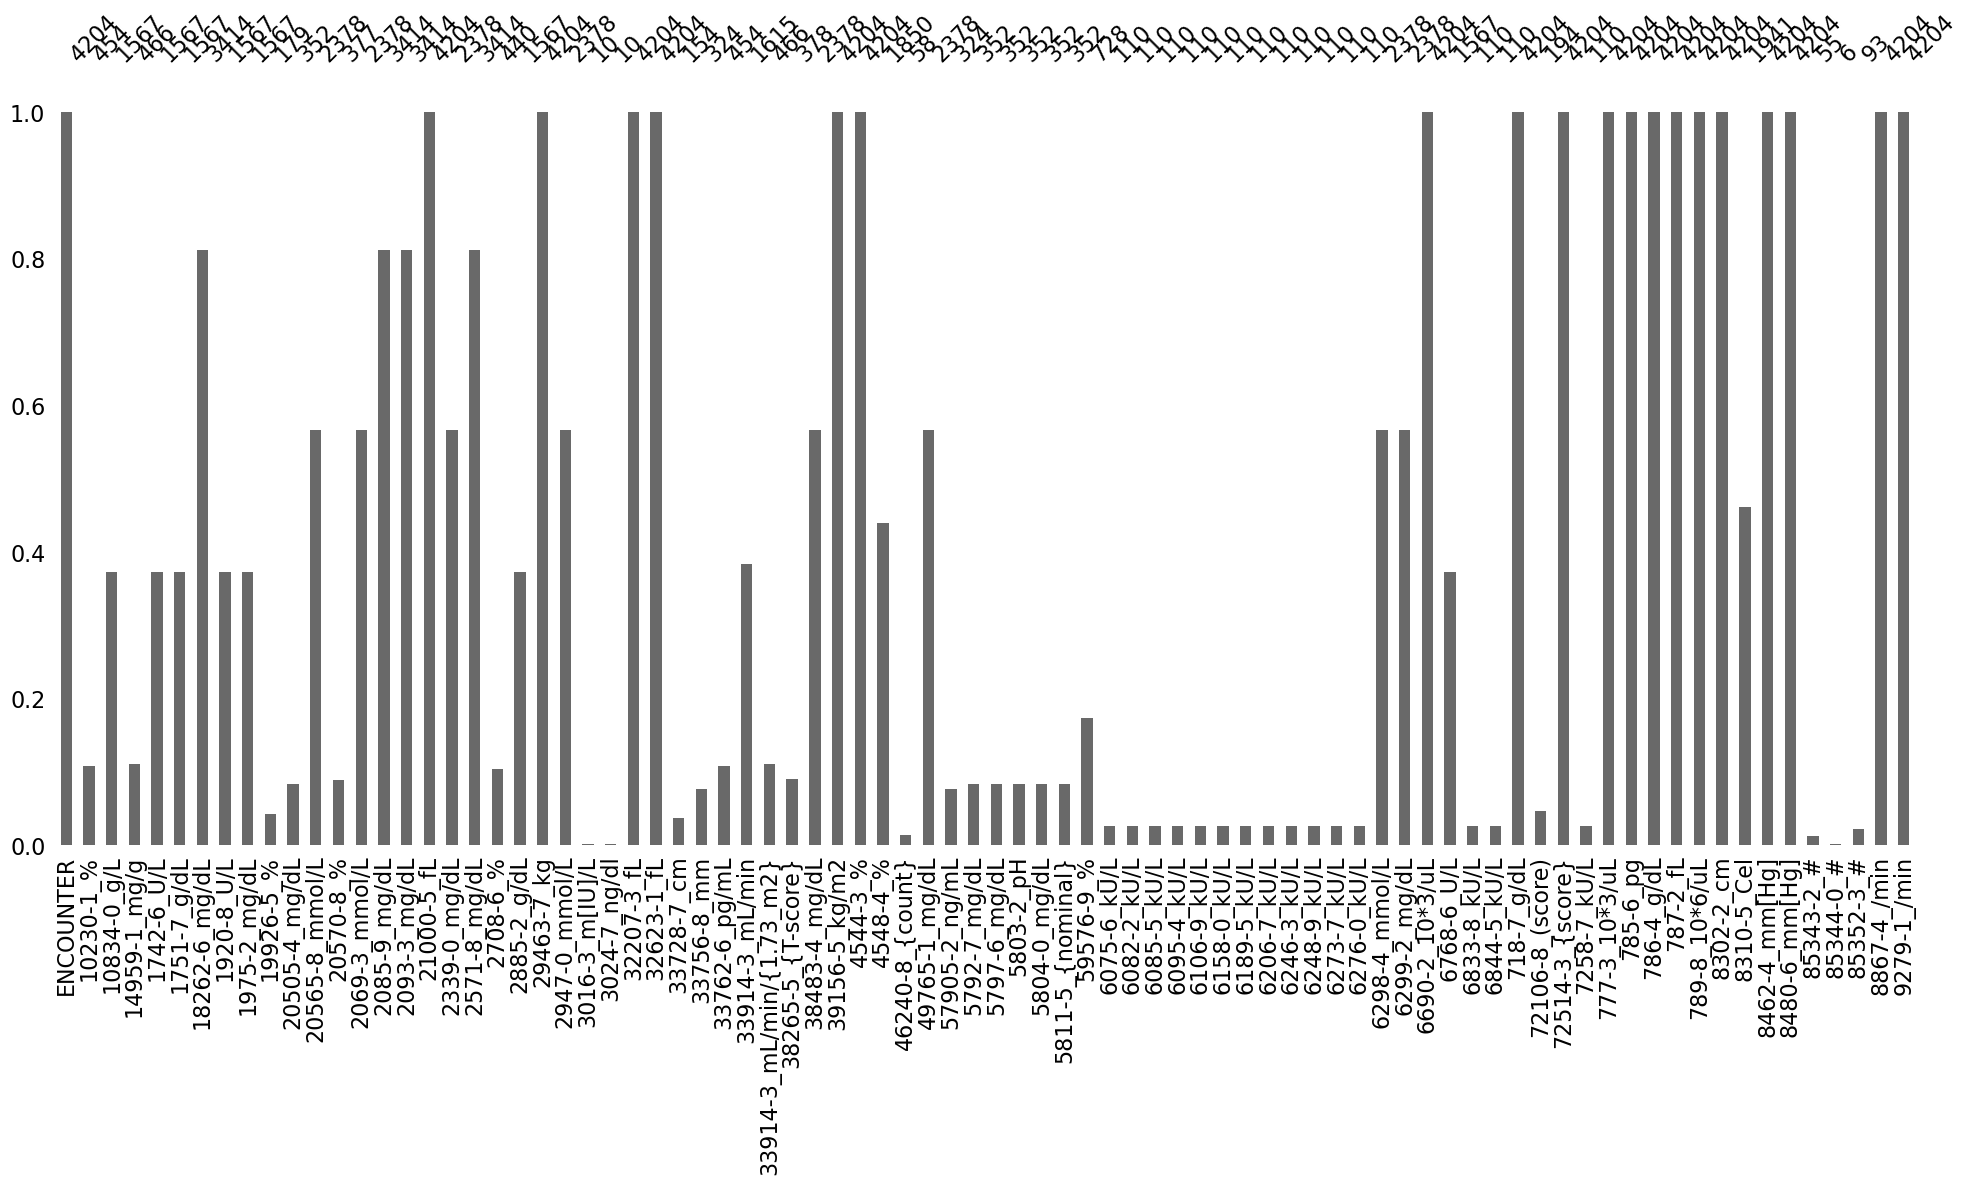

In [53]:
#Visualize missing values in the entire df
import missingno as msno
msno.bar(num_encounter_observations)

In [54]:
#Percentage_of_missing_values
num_encounter_observations.isnull().mean()*100

ENCOUNTER        0.000000
10230-1_%       89.200761
10834-0_g/L     62.725975
14959-1_mg/g    88.915319
1742-6_U/L      62.725975
                  ...    
85343-2_#       98.691722
85344-0_#       99.857279
85352-3_#       97.787821
8867-4_/min      0.000000
9279-1_/min      0.000000
Length: 82, dtype: float64

# Process categorical observations

In [55]:
# one-hot-encode cat_observations
cat_observations['VALUE'] = cat_observations['CODE'].astype(str) + '_' +cat_observations['VALUE']
cat_observations = cat_observations.drop(columns=['CODE','DESCRIPTION'])
cat_observations = pd.get_dummies(cat_observations, columns = ['VALUE'])
cat_observations

,DATE,PATIENT,ENCOUNTER,VALUE_20454-5_{nominal}_Urine protein test = + (finding),VALUE_20454-5_{nominal}_Urine protein test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = trace (finding),VALUE_25428-4_{nominal}_Urine glucose test = ++ (finding),VALUE_28245-9_{nominal}_No signs/symptoms,VALUE_28245-9_{nominal}_Severe signs/symptoms,...,VALUE_nan_Stage 3A (qualifier value),VALUE_nan_Stage 3C (qualifier value),VALUE_nan_Stage 4 (qualifier value),VALUE_nan_Sudden Cardiac Death,VALUE_nan_T1 category (finding),VALUE_nan_T2 category (finding),VALUE_nan_T3 category (finding),VALUE_nan_T4 category (finding),VALUE_nan_Treatment changed (situation),VALUE_nan_Worsening (qualifier value)
223681,1948-02-06 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,f654f104-9859-461f-ba35-ecc013873c22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223691,1949-02-11 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,60c34b9a-de5f-4dce-aef2-dd55ab4a5ea2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223701,1950-02-17 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,c0cad569-306d-4fbc-a7af-1119d226c6b6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223711,1951-02-23 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,da92a2cd-35a4-4580-a016-29c3eee1c265,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223732,1952-02-29 20:51:21+00:00,344de08b-bae0-4d79-b89e-a2b6204e1a21,d8ff6388-ee58-4641-8902-acf8498e99ba,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77892,2020-04-21 09:24:36+00:00,f186b9f3-8c70-4bbc-8335-4bb2ccca0a3c,783da9b4-5c9b-44d4-8f3a-104c48335201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76477,2020-04-22 15:17:08+00:00,9ec4030b-2529-4647-b325-b04c6b44874b,19cd0f10-c57e-4770-8edb-7d026d369f5c,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214563,2020-04-24 09:03:43+00:00,96ef7705-0147-4231-af55-dde1c20ead7e,94f3aec7-e7a8-49e3-9950-799d9b7dcd98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102198,2020-04-26 03:15:59+00:00,a1678674-817f-4454-b79d-f8a7396bc150,3c5e3eb3-338e-4e1c-8ea3-0cd6163b1afe,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
col_list= list(cat_observations.columns[3:])

cat_observations = cat_observations.groupby(['PATIENT']).apply(lambda x: [list(x[col]) for col in col_list]+[list(x['ENCOUNTER'])]).apply(pd.Series)
cat_observations= cat_observations.reset_index()
cat_observations.columns = ['PATIENT'] + col_list+ ['encounters']

In [57]:
cat_observations

,PATIENT,VALUE_20454-5_{nominal}_Urine protein test = + (finding),VALUE_20454-5_{nominal}_Urine protein test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = trace (finding),VALUE_25428-4_{nominal}_Urine glucose test = ++ (finding),VALUE_28245-9_{nominal}_No signs/symptoms,VALUE_28245-9_{nominal}_Severe signs/symptoms,VALUE_32167-9_{nominal}_Translucent (qualifier value),VALUE_55277-8_{nominal}_HIV positive,...,VALUE_nan_Stage 3C (qualifier value),VALUE_nan_Stage 4 (qualifier value),VALUE_nan_Sudden Cardiac Death,VALUE_nan_T1 category (finding),VALUE_nan_T2 category (finding),VALUE_nan_T3 category (finding),VALUE_nan_T4 category (finding),VALUE_nan_Treatment changed (situation),VALUE_nan_Worsening (qualifier value),encounters
0,0149d553-f571-4e99-867e-fcb9625d07c2,"[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[d11e112e-17bb-44c5-9f61-f3c73faa3ceb, 1508a3b..."
1,01e1f394-7219-4189-bceb-3cbd90cff90b,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[39ae561e-eb9f-403b-a427-474eca86ae8a, 2adc4fa..."
2,0325261f-61eb-46f8-acc6-89d15053fecd,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[bf6e10e5-c52a-40b7-be8a-3567d2e412f1, 8e815d2..."
3,0447625b-b860-483c-9f30-17ed375b1493,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[a9cb5312-a57f-4b35-b1ef-1fe72ce0603d, 1d6c8bd..."
4,04a849f4-1aaf-4112-a62f-d44df4325773,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 

In [58]:
# Get the last value in the encounter/history. If there is no value for the encounter/history impute with the last value for the patient

dfs=[]
for col in col_list:
    encounter_dict = {}
    fin_values = {}
    for i, row in cat_observations.iterrows():
        for j in range(len(row['encounters'])):
            encounter = row['encounters'][j]
            history = row[col][:j+1]
            encounter_dict[encounter] = history
            try:
                num = history[-1]
                fin_values[encounter] = num
            except:
                try:
                    num = row[col][-1]
                    fin_values[encounter] = num
                except:
                    num = np.nan
                    fin_values[encounter] = num
 
    dfs.append(pd.DataFrame([fin_values]))
    
history_encounter_observations = pd.concat(dfs)

In [59]:
cat_encounter_observations = history_encounter_observations.T.reset_index()
cat_encounter_observations.columns = ["ENCOUNTER"]+col_list

In [60]:
cat_encounter_observations

,ENCOUNTER,VALUE_20454-5_{nominal}_Urine protein test = + (finding),VALUE_20454-5_{nominal}_Urine protein test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = +++ (finding),VALUE_2514-8_{nominal}_Urine ketone test = trace (finding),VALUE_25428-4_{nominal}_Urine glucose test = ++ (finding),VALUE_28245-9_{nominal}_No signs/symptoms,VALUE_28245-9_{nominal}_Severe signs/symptoms,VALUE_32167-9_{nominal}_Translucent (qualifier value),VALUE_55277-8_{nominal}_HIV positive,...,VALUE_nan_Stage 3A (qualifier value),VALUE_nan_Stage 3C (qualifier value),VALUE_nan_Stage 4 (qualifier value),VALUE_nan_Sudden Cardiac Death,VALUE_nan_T1 category (finding),VALUE_nan_T2 category (finding),VALUE_nan_T3 category (finding),VALUE_nan_T4 category (finding),VALUE_nan_Treatment changed (situation),VALUE_nan_Worsening (qualifier value)
0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1508a3b9-3faa-4490-a340-a193d9401623,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5142c928-64a4-4120-bf84-55d62405ec81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b4633f40-493f-4dc1-b360-7d0f75b3bd52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39ae561e-eb9f-403b-a427-474eca86ae8a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,17c418af-9e94-40e6-a55a-f14ce44875f2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3217,4fa5ad18-873a-400e-a0e0-aa0ed5e4e4a2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3218,6cbb6cac-cad5-46e1-a4da-4f8cef9e7463,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3219,d2bd3ce7-8253-4a40-b7c5-25169258d83e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Join observations dfs

observations = pd.merge(num_encounter_observations, cat_encounter_observations, on='ENCOUNTER', how="outer")

In [62]:
observations = observations.reset_index()

In [63]:
observations


,index,ENCOUNTER,10230-1_%,10834-0_g/L,14959-1_mg/g,1742-6_U/L,1751-7_g/dL,18262-6_mg/dL,1920-8_U/L,1975-2_mg/dL,...,VALUE_nan_Stage 3A (qualifier value),VALUE_nan_Stage 3C (qualifier value),VALUE_nan_Stage 4 (qualifier value),VALUE_nan_Sudden Cardiac Death,VALUE_nan_T1 category (finding),VALUE_nan_T2 category (finding),VALUE_nan_T3 category (finding),VALUE_nan_T4 category (finding),VALUE_nan_Treatment changed (situation),VALUE_nan_Worsening (qualifier value)
0,0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,NaN,NaN,NaN,NaN,NaN,71.7,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1508a3b9-3faa-4490-a340-a193d9401623,NaN,NaN,NaN,NaN,NaN,89.2,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4600cd16-8cc7-467e-af7c-fca906341a60,NaN,NaN,NaN,NaN,NaN,89.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5142c928-64a4-4120-bf84-55d62405ec81,NaN,NaN,NaN,NaN,NaN,88.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,b4633f40-493f-4dc1-b360-7d0f75b3bd52,NaN,NaN,NaN,NaN,NaN,88.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,4240,fccf2e7a-10dd-4520-83b0-5edee06c02c5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,4241,b74d1949-ce2f-45fe-b13a-daa1dc2eaa5b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,4242,2dfb8d2a-0ad5-47b4-86f9-582a39fb91ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4243,4243,93d11453-35b3-44fe-b35c-7abb4e6d060e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Get patient age at visit
features = pd.merge(conditions_history_df, observations, on='ENCOUNTER', how="left")
final_df = pd.merge(encounters_df, features, on='ENCOUNTER', how="right")


In [65]:
#drop columns with 70% missing values
df = final_df.dropna(thresh=final_df.shape[0]*0.6, axis=1)

In [66]:
df

,ENCOUNTER,DATE,STOP,PATIENT,AGE,history,num_pregnancy_visits,outcome,normal_pregnancy,Acute allergic reaction,...,Second degree burn,Seizure disorder,Sinusitis (disorder),Sprain of ankle,Sprain of wrist,Streptococcal sore throat (disorder),Stroke,Tubal pregnancy,Viral sinusitis (disorder),Whiplash injury to neck
0,d11e112e-17bb-44c5-9f61-f3c73faa3ceb,2010-09-02 13:13:20+00:00,2010-09-02 18:28:20+00:00,0149d553-f571-4e99-867e-fcb9625d07c2,31,"[12, 13, 86, 5]",0,75,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3c88f6a7-964f-49f7-a9ed-85c52d747ebe,2010-03-19 14:39:24+00:00,2010-03-19 19:54:24+00:00,01e1f394-7219-4189-bceb-3cbd90cff90b,43,[86],0,75,1,0,...,0,0,0,0,0,0,0,0,0,0
2,50d8b07c-6fd8-4fcc-a8cf-261719005462,2010-10-01 14:39:24+00:00,2010-10-01 15:39:24+00:00,01e1f394-7219-4189-bceb-3cbd90cff90b,43,"[86, 75, 102]",1,6,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3b063336-f151-42e5-b17d-957249530d64,2013-05-10 14:39:24+00:00,2013-05-10 19:54:24+00:00,01e1f394-7219-4189-bceb-3cbd90cff90b,46,"[86, 75, 102, 6, 96]",2,75,1,0,...,1,0,0,0,0,1,0,0,0,0
4,cd5830a3-5c27-41c6-8a1f-3eba1169c623,1966-03-22 13:04:22+00:00,1966-03-22 13:49:22+00:00,0325261f-61eb-46f8-acc6-89d15053fecd,44,"[48, 16, 86]",0,69,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0f50789a-63de-4ea7-95de-6636597ab819,2013-09-23 10:57:26+00:00,2013-09-23 16:12:26+00:00,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,36,"[25, 56, 20, 24, 69, 36]",1,75,1,0,...,0,0,0,0,0,0,0,0,0,0
756,cba000d2-0fec-486d-ae55-dfa9a7b20b65,2014-11-03 10:57:26+00:00,2014-11-03 16:12:26+00:00,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,37,"[25, 56, 20, 24, 69, 36, 75, 29, 3]",2,75,1,0,...,0,0,0,0,0,0,0,0,0,0
757,4db3c00c-f631-4678-ac84-23ddc4c1c553,1993-02-03 12:00:58+00:00,1993-02-03 17:15:58+00:00,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,27,"[47, 7, 12]",0,75,1,0,...,0,0,0,0,0,0,0,0,0,0
758,14cf9ccc-a6b8-4fca-9f73-71cce58aa534,1998-08-05 12:00:58+00:00,1998-08-05 17:15:58+00:00,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,32,"[47, 7, 12, 75]",1,75,1,0,...,0,0,0,0,0,0,0,0,0,0


# ML Models

In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score, roc_auc_score, log_loss
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
import math

In [70]:
df[["num_pregnancy_visits", "outcome", "normal_pregnancy"]]= df[["num_pregnancy_visits", "outcome", "normal_pregnancy"]].astype(int)
X = df.drop(columns = ["normal_pregnancy", "outcome", "history",  "PATIENT", "DATE", "STOP", "ENCOUNTER"])
y = df[["normal_pregnancy"]]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Logistic regression model

In [84]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
model = GridSearchCV(clf, param_grid=parameters, cv=5, scoring='roc_auc')
clf_result = model.fit(X_train, y_train)

# summarize result
print(f"Best Score: {clf_result.best_score_}")
print(f"Best Hyperparameters: {clf_result.best_params_}")

Best Score: 0.7286611762221518
Best Hyperparameters: {'C': 0.1}


# RF classification model

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 1234)

grid_params = {
    'n_estimators': [100, 150, 300, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'criterion' :['gini', 'entropy']
}

rf_grid_cv = GridSearchCV(estimator=rfc,scoring='roc_auc', param_grid=grid_params, cv=3, verbose=1)

rf_result = rf_grid_cv.fit(X_train, y_train)


# summarize result
print(f"Best Score: {rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Score: 0.7733763520723432
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 500}


In [86]:
best_model = rf_result.best_estimator_
y_pred = best_model.predict(X_test)

In [87]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        95
           1       0.75      0.78      0.76       133

    accuracy                           0.72       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.72      0.72      0.72       228



In [89]:
# ROC- AUC score
print(f'ROC-AUC score: {roc_auc_score(y_test,y_pred_prob):.4f}')
#Accuracy score
print(f'Accuracy score: {accuracy_score(y_test,y_pred):.4f}')

ROC-AUC score: 0.7482
Accuracy score: 0.7193


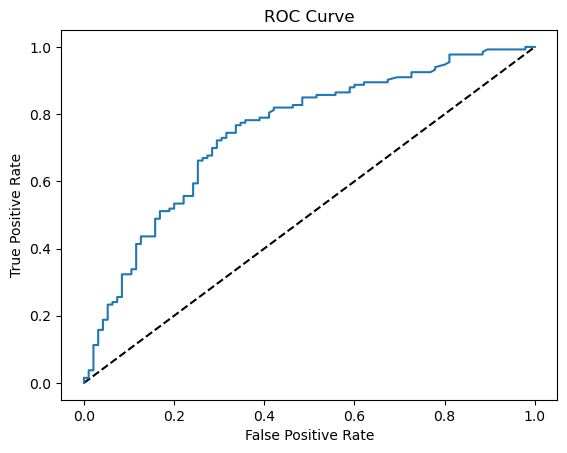

AUC: 0.7482390185991294


In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# XGBoost classification model

In [91]:
# Import Extreme Gradient Boosting Classification Model 
from xgboost import XGBClassifier
#Since the we have a class imbalance, we have to account for that using 'scale_pos_weight'
#define classifier
xgbc = XGBClassifier(random_state= 42)
#define parameters
grid_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid_cv = GridSearchCV(estimator=xgbc, scoring='roc_auc', param_grid=grid_params, cv=3, n_jobs=-1, verbose=1)
#execute search
xgb_result = xgb_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score: {xgb_result.best_score_}")
print(f"Best Hyperparameters: {xgb_result.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Score: 0.7728555759197414
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [92]:
bst_model = xgb_result.best_estimator_
y_predx = bst_model.predict(X_test)

In [93]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_probx = bst_model.predict_proba(X_test)[:, 1]

In [94]:
print(classification_report(y_test, y_predx))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65        95
           1       0.74      0.77      0.76       133

    accuracy                           0.71       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.71      0.71      0.71       228



In [95]:
# ROC- AUC score
print(f'ROC-AUC score: {roc_auc_score(y_test,y_pred_probx):.4f}')
#Accuracy score
print(f'Accuracy score: {accuracy_score(y_test,y_predx):.4f}')

ROC-AUC score: 0.7569
Accuracy score: 0.7105


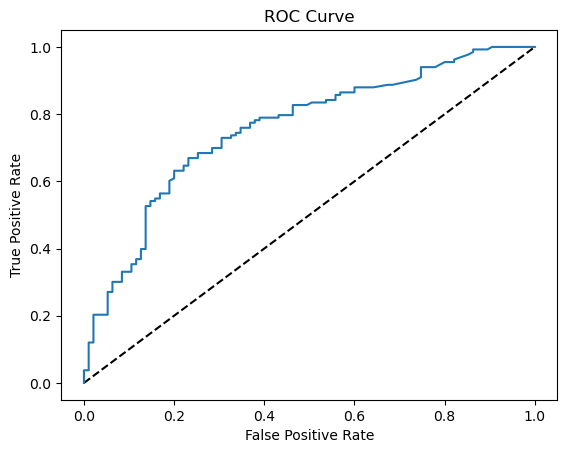

AUC: 0.7569449940641076


In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probx)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_probx)))